In [17]:
source("~/source_all.R")

In [2]:
setwd("/data/work/Projects/STU/230726_DiCarvalho_Cytassist/")
dir.create("250131")
setwd("250131")

In [5]:
#system("cp ../SpotClean_res.RDS .")

In [6]:
#### Global variables ####
dir = "/data/work/Projects/STU/230726_DiCarvalho_Cytassist//"
#Cellranger mode
mode="count"
#Analysis name (will be reflected everywhere)
analysisname="Carvalho"
app.username="carvalholab"
app.password="fksni"
use_decontx.counts = F
#Plot size
options(repr.plot.width=8, repr.plot.height=8)
#Filtering parameters
folders = list.files(path=dir, pattern="SR210$",full.names=T)
samplenames = c("NR1","NR3-4.1","NR3-4.2","NR6")
seur_obj = load_visium(folders,samplenames = samplenames)
if(!file.exists("SpotClean_res.RDS")){
    
    decont = run_spotclean(folders,spaceranger = 2)
    seur_obj = add_contamination_visium(seur_obj,decont,folders)
}else{
    decont = readRDS("SpotClean_res.RDS")
    contamination = unlist(sapply(seq(1, length(decont)), function(x) {
        contam = metadata(decont[[x]])$contamination_rate
        names(contam) = paste(folders[x], names(contam), sep = "_")
        return(contam)
    }, simplify = F))
    names(contamination) = NULL
    seur_obj$Contamination = contamination
}

In [7]:
#Ensure names match
common.genes = Reduce(intersect,lapply(decont, function(x) rownames(x)))
#Get Spotclean counts - Merge only common genes
spotclean_counts.list = lapply(decont, function(x) round(assay(x))[common.genes,])
#Make sure column names are separate and according to sample
spotclean_counts.list = sapply(seq(1,length(samplenames)), function(x){
    y = spotclean_counts.list[[x]]
    colnames(y) = paste(samplenames[x],colnames(y),sep="_")
    return(y)
    },simplify=F
)
spotclean_counts = do.call(cbind, spotclean_counts.list)
seur_obj[["RNA2"]] = CreateAssay5Object(spotclean_counts)
DefaultAssay(seur_obj) = "RNA2"
seur_obj[["RNA"]] = NULL
seur_obj[["RNA"]] = seur_obj[["RNA2"]]
DefaultAssay(seur_obj) = "RNA"
seur_obj[["RNA2"]] = NULL

Warning message:
“Cannot find cell-level meta data named  RNA”
Warning message:
“Key ‘rna2_’ taken, using ‘rna_’ instead”


In [8]:
seur_obj = JoinLayers(seur_obj, assay="Spatial")
seur_obj$nFeature_RNA = seur_obj$nFeature_RNA2
seur_obj$nCount_RNA = seur_obj$nCount_RNA2
Idents(seur_obj) = seur_obj$Sample
seur_obj$log_nCount_Spatial = log2(seur_obj$nCount_Spatial)
seur_obj$log_nFeature_Spatial = log2(seur_obj$nFeature_Spatial)

Misc(seur_obj,"mito_thres") = 0.2
Misc(seur_obj,"ribo_thres") = 100
Misc(seur_obj,"count_thres_min") = 600
Misc(seur_obj,"feature_thres_min") = 400
Misc(seur_obj,"count_thres_max") = Inf
Misc(seur_obj,"feature_thres_max") = Inf
Misc(seur_obj,"contam_thres") = 0.75

seur_obj$percent_mito=0
seur_obj$percent_ribo=0

seur_obj = filter_seur_obj(seur_obj)


Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV o

Running SCTransform on assay: RNA

Running SCTransform on layer: counts.NR1

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 8328 by 3445

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3445 cells

Found 25 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8328 genes

Computing corrected count matrix for 8328 genes

Calculating gene attributes

Wall clock passed: Time difference of 23.23986 secs

Determine variable features

Centering data matrix

Running SCTransform on layer: counts.NR3-4.1

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 8328 by 2214

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2214 cells

Found 202 outlie

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10665
Number of edges: 363201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9520
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10665
Number of edges: 370869

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9365
Number of communities: 8
Elapsed time: 0 seconds


Found 4 SCT models. Recorrecting SCT counts using minimum median counts: 3406

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10665
Number of edges: 359148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9116
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10665
Number of edges: 387102

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9000
Number of communities: 6
Elapsed time: 1 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10665
Number of edges: 346604

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9391
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10665
Number of edges: 353869

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9155
Number of communities: 7
Elapsed time: 0 seconds
                orig.ident SCT_clusters integrated_clusters harmony_clusters
integratedcca_1  0.5046898     54.93699            54.83059         58.18922
integratedcca_2  0.2563200     42.84158            23.81801         51.79819
integratedcca_3  0.7042408     26.70559            23.54515         45.33197
integratedcca_4  0.1142042     25.42197            20.59282         25.23432
integratedcca_5  0.1296368     13.26291            17.51775         20.23754
integratedcca_6  0.3480110     24.35685            41.63864         28.43993
                harmonysct_clusters RNA_clusters   nCount_SCT cca_clusters
integratedcca_1            56.29249    17.929204 9.743629e-06     74.31075
integratedcca_2            39.07229     9.059608 1.479207e-01    

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables



[1] "RNA silhouette"
         0     1     2     3    4     5     6     7
[1,] 0.433 0.083 0.444 0.481 0.13 0.253 0.411 0.473
[1] "SCT silhouette"
         0      1      2     3      4      5     6      7      8     9    10
[1,] 0.385 -0.191 -0.065 0.315 -0.166 -0.183 0.118 -0.221 -0.136 0.017 0.008
[1] "Harmony silhouette"
        0     1     2     3     4     5     6     7
[1,] 0.34 0.491 0.144 0.217 0.569 0.302 0.274 0.288
[1] "HarmonySCT silhouette"
         0      1     2      3      4     5     6
[1,] 0.212 -0.133 0.232 -0.103 -0.022 0.032 0.271
[1] "Integrated silhouette"
         0     1      2      3     4     5     6
[1,] 0.244 0.033 -0.059 -0.015 0.098 0.271 0.062
[1] "CCA silhouette"
         0     1     2     3      4     5
[1,] 0.413 0.123 0.095 0.084 -0.179 0.259


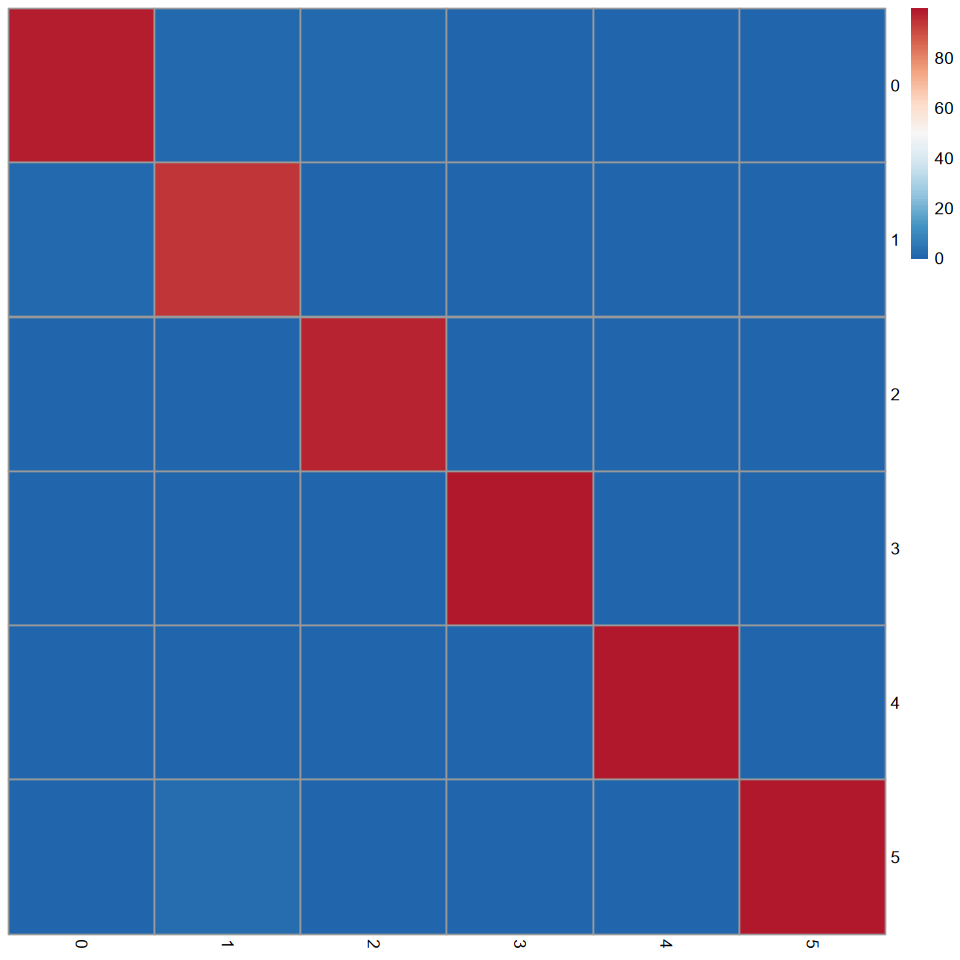

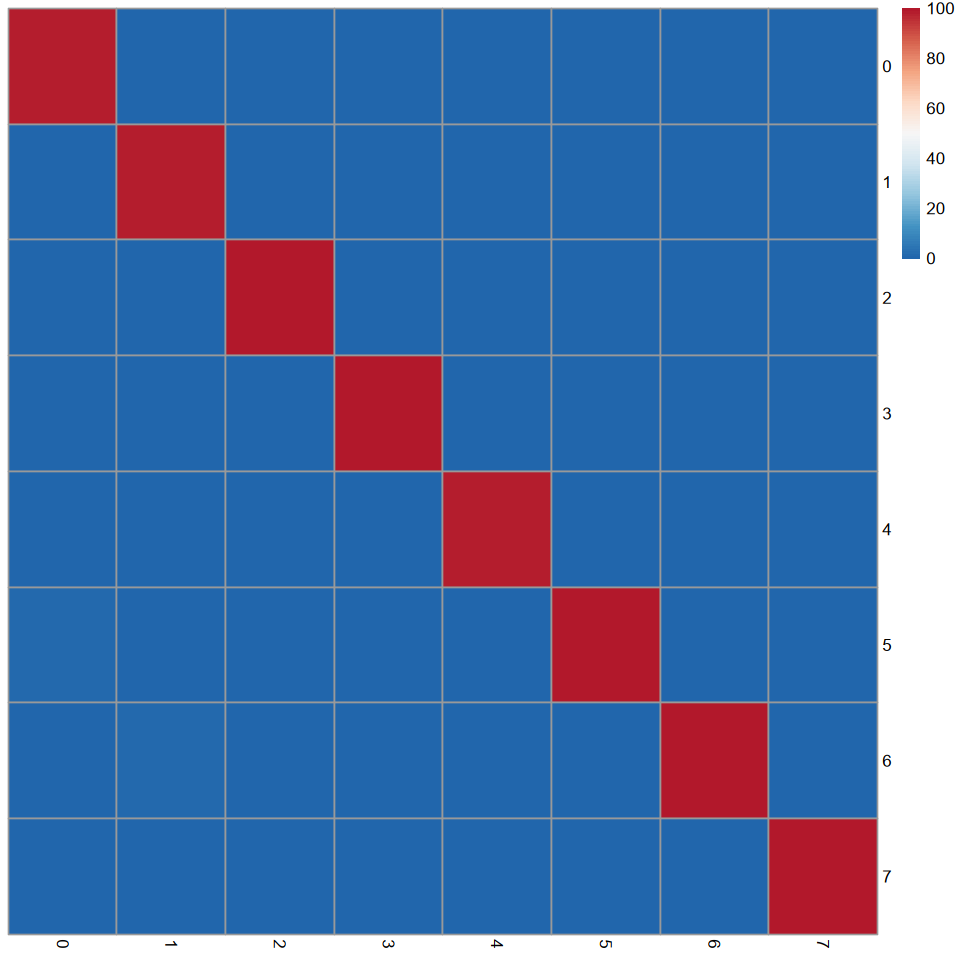

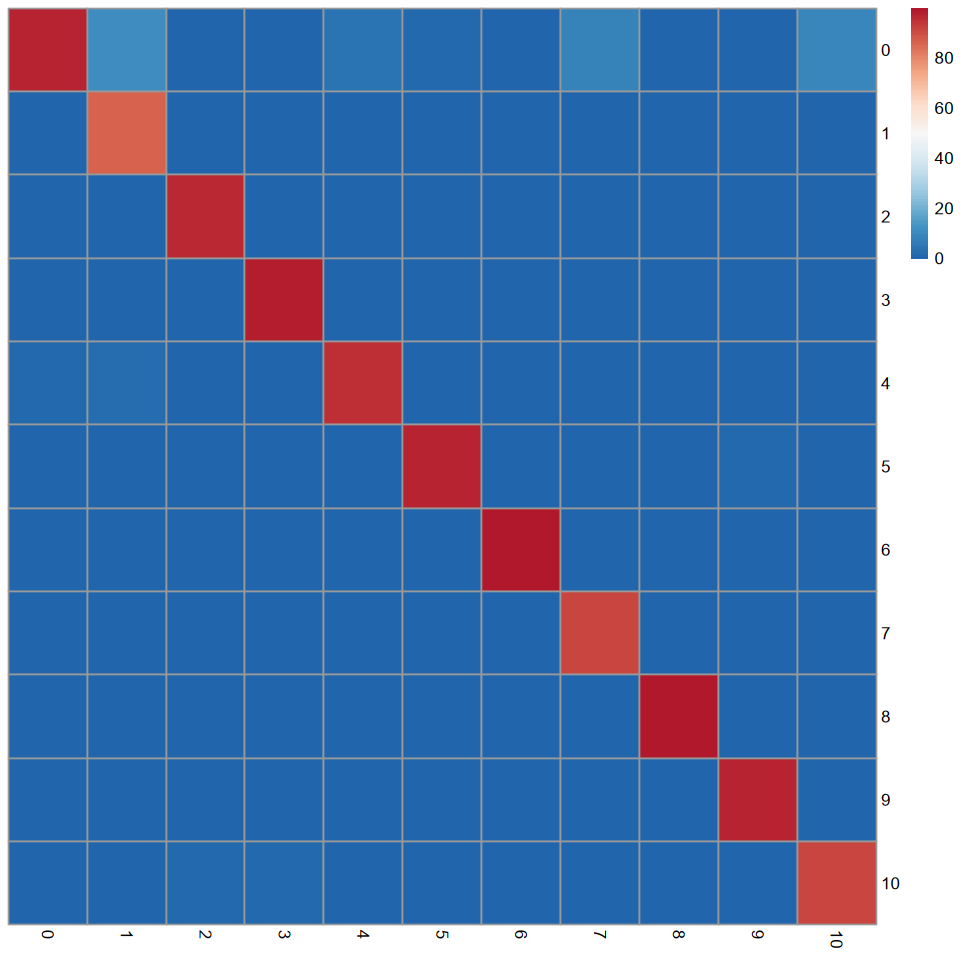

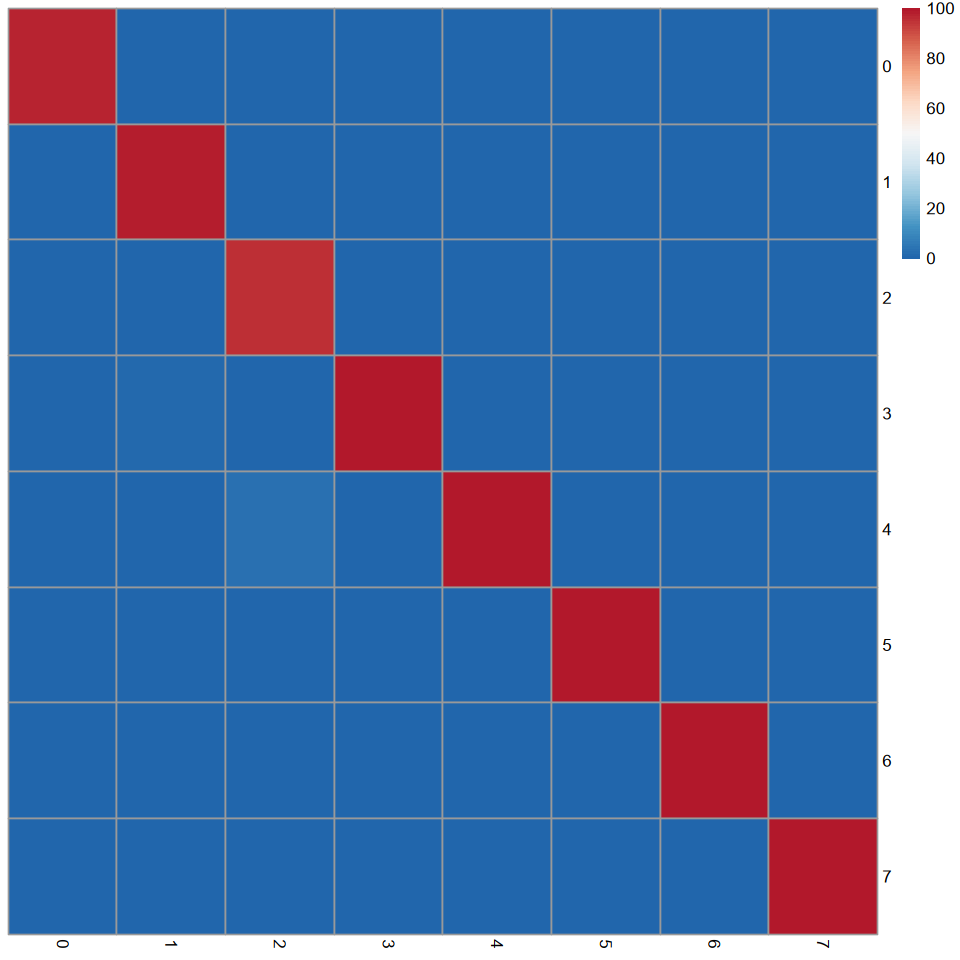

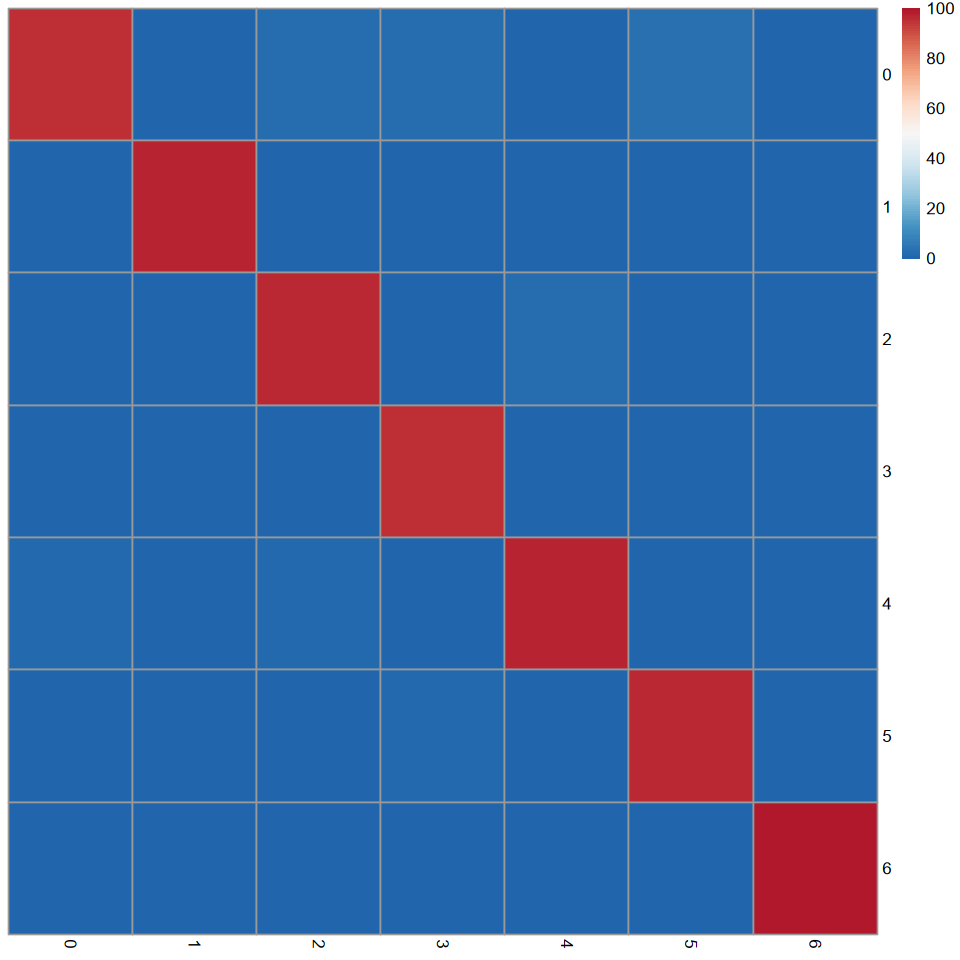

[1] "RNA NMI: 0.764083921579893"
[1] "SCT NMI: 0.64748821891202"
[1] "Harmony NMI: 0.41166483387873"
[1] "Harmony SCT NMI: 0.259876561099471"
[1] "Integration NMI: 0.335817933984947"
[1] "CCA NMI: 0.0240203059979398"


Warning message in system(paste("python ~/run_scib.py", getwd(), cluster_name, batch_name, :
“running command 'python ~/run_scib.py /data/work/Projects/STU/230726_DiCarvalho_Cytassist/250131 integrated_clusters Sample 15' had status 1”


Time difference of 2.324153 secs


Warning message in dir.create("Output"):
“'Output' already exists”
Warning message in system(paste("python ~/run_scib.py", getwd(), cluster_name, batch_name, :
“running command 'python ~/run_scib.py /data/work/Projects/STU/230726_DiCarvalho_Cytassist/250131 RNA_clusters Sample 15' had status 1”


Time difference of 1.271133 secs


Warning message in dir.create("Output"):
“'Output' already exists”
Warning message in system(paste("python ~/run_scib.py", getwd(), cluster_name, batch_name, :
“running command 'python ~/run_scib.py /data/work/Projects/STU/230726_DiCarvalho_Cytassist/250131 SCT_clusters Sample 15' had status 1”


Time difference of 1.173325 secs


Warning message in dir.create("Output"):
“'Output' already exists”
Warning message in system(paste("python ~/run_scib.py", getwd(), cluster_name, batch_name, :
“running command 'python ~/run_scib.py /data/work/Projects/STU/230726_DiCarvalho_Cytassist/250131 harmony_clusters Sample 15' had status 1”


Time difference of 0.8701963 secs


Warning message in dir.create("Output"):
“'Output' already exists”
Warning message in system(paste("python ~/run_scib.py", getwd(), cluster_name, batch_name, :
“running command 'python ~/run_scib.py /data/work/Projects/STU/230726_DiCarvalho_Cytassist/250131 harmonysct_clusters Sample 15' had status 1”


Time difference of 0.7940645 secs
$kBET_score_integrated.rpca_integrated_clusters
character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

$kBET_score_RNA_PCA_RNA_clusters
character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

$kBET_score_SCT_PCA_SCT_clusters
character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

$kBET_score_harmony_harmony_clusters
character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

$kBET_score_harmonysct_harmonysct_clusters
character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

list()


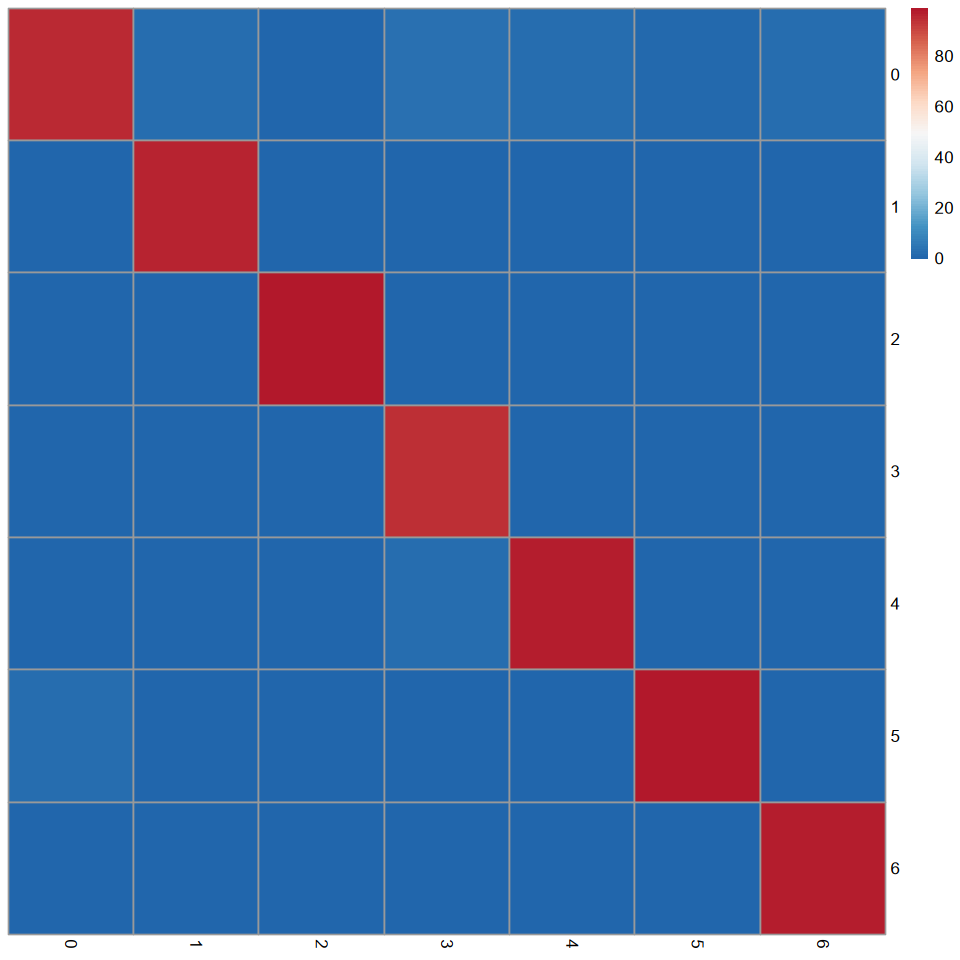

In [9]:
seur_obj$orig.ident = seur_obj$Sample = seur_obj$Batch
seur_obj = run_integration_v5(seur_obj,run_cca = T,dims = 15)
seur_obj = run_quick_qc(seur_obj,dims = 15,res = 0.2)

In [21]:
Misc(seur_obj,"Analysisname") = "FilipeCarvalhoJanuary2025"

Warning message:
“Overwriting miscellanous data for Analysisname”


In [23]:
seur_obj = select_assay(seur_obj,"harmonysct")

Warning message:
“Overwriting miscellanous data for cluster.choose”
Warning message:
“Overwriting miscellanous data for reduction.choose”
Warning message:
“Overwriting miscellanous data for embedding.choose”
Warning message:
“Overwriting miscellanous data for assay.choose”


In [24]:
seur_obj = run_presto_compartment_markers(seur_obj)
seur_obj = run_subclustering_presto(seur_obj,dims.choose = 1:10)

[1] "0"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3220
Number of edges: 108967

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8677
Number of communities: 3
Elapsed time: 0 seconds
[1] "2"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1826
Number of edges: 61957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8827
Number of communities: 3
Elapsed time: 0 seconds


Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x2umap_’ instead”
Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x2umap_’ instead”


[1] "1"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2273
Number of edges: 73301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8716
Number of communities: 3
Elapsed time: 0 seconds


Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x1umap_’ instead”
Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x1umap_’ instead”


[1] "5"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 424
Number of edges: 13344

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8540
Number of communities: 3
Elapsed time: 0 seconds


Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x5umap_’ instead”
Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x5umap_’ instead”


[1] "3"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1455
Number of edges: 47931

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8814
Number of communities: 3
Elapsed time: 0 seconds


Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x3umap_’ instead”
Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x3umap_’ instead”


[1] "4"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1141
Number of edges: 40460

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8391
Number of communities: 2
Elapsed time: 0 seconds


Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x4umap_’ instead”
Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x4umap_’ instead”


[1] "6"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 326
Number of edges: 10009

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8611
Number of communities: 3
Elapsed time: 0 seconds


Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x6umap_’ instead”
Warning message:
“Key ‘harmonysctumapopt_’ taken, using ‘x6umap_’ instead”


In [25]:
tam.genes = "SLC16A10

DMXL2

SLC11A1

FMNL2

ABCA1

KCNMA1

ERRFI1

CTSB

TYMP

PLA2G7

SPP1

NPL

CTSL

PARP14

IFI44L

FTL

TFRC

RALA

EPSTI1

PMP22

APOE

PLAU

ABCG1

GPNMB

RNASE1

IL2RA

CD80

XAF1

GNB4

HIF1A-AS3

IFI27

ATP6V0A1

IFI30

SIGLEC1

STAT1

WIPI1

STEAP1B

ARL4C

SPTAN1

CABLES1

SGPL1

SNTB1

CTSD

SCO2

DRAM1

CLIP4

SOAT1

EEPD1

TMEM51

PARP9

SRGAP1

PSTPIP2

PALD1

AOAH

RGS1

HLA-DRB1

HERPUD1

ABCC4

HLA-DRA

CD74

AREG

HLA-DPA1

NR4A3

HLA-DPB1

CCDC26

ADAM28

HLA-DQA1

CD86

PID1

JAML

NHSL1

MS4A4E

HLA-DRB5

RTN1

INSR

PLA2G4A

PCNX2

USP53

HLA-DQB1

SGK1

IL1R2

GRASP

IL13RA1

AFF3

KLHL5

DAGLB

SKIL

AC104365.1

ST18

CD83

OTULINL

AC087286.2

NR4A2

SYAP1

B3GNT5

TRA2B

NR4A1

PHLPP1

OGFRL1"
tam.genes = unlist(strsplit(tam.genes,"\n"))[1:30]
tam.genes = setdiff(tam.genes,"")
library(GSEABase)
geneSets <- GeneSet(tam.genes, setName="TAMs")
library(AUCell)
cells_AUC <- AUCell_run(LayerData(seur_obj, assay="RNA",layer="counts"), geneSets)

Loading required package: annotate

Loading required package: XML


Attaching package: ‘XML’


The following object is masked from ‘package:patchwork’:

    free



Attaching package: ‘annotate’


The following object is masked from ‘package:BiocNeighbors’:

    findNeighbors


Loading required package: graph


Attaching package: ‘graph’


The following object is masked from ‘package:XML’:

    addNode


The following objects are masked from ‘package:igraph’:

    degree, edges, intersection


The following object is masked from ‘package:stringr’:

    boundary


The following object is masked from ‘package:plyr’:

    join



Attaching package: ‘AUCell’


The following object is masked from ‘package:tradeSeq’:

    plotGeneCount




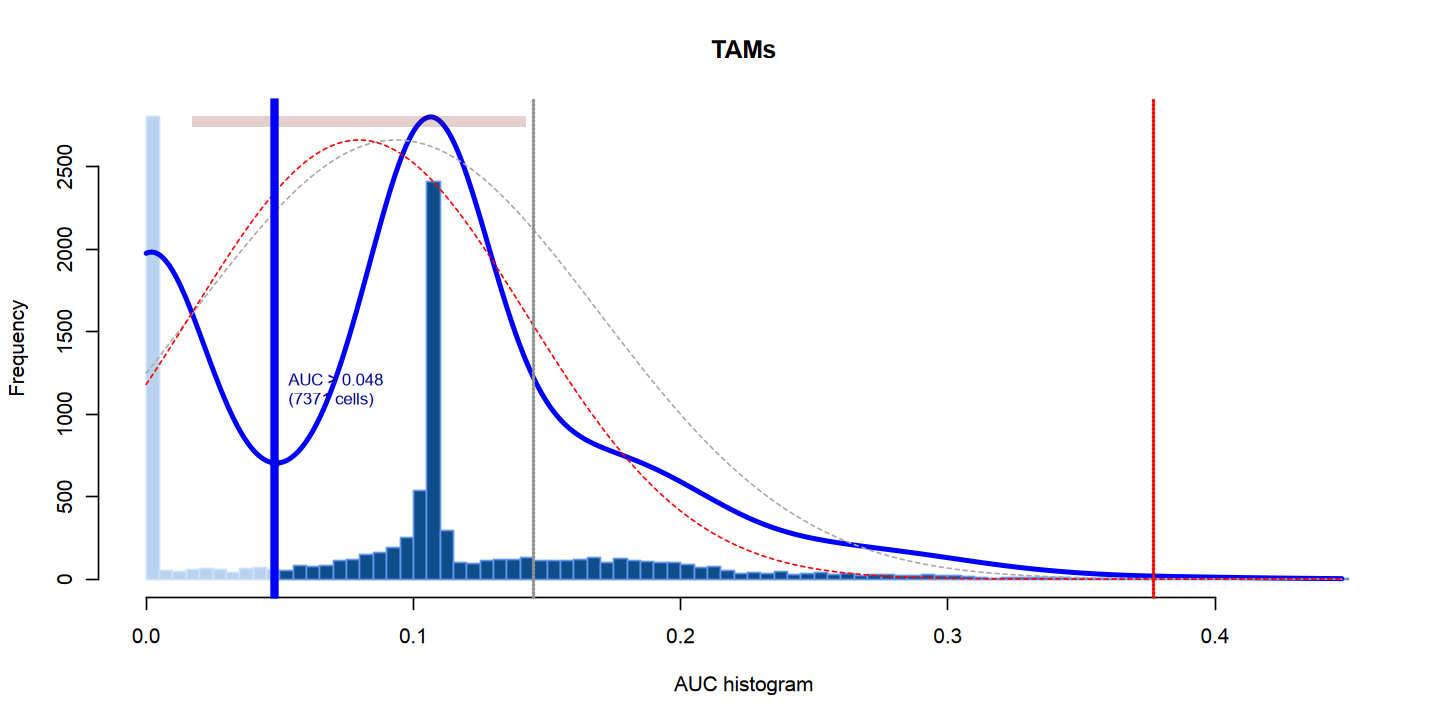

In [26]:
cells_assignment <- AUCell_exploreThresholds(cells_AUC, plotHist=TRUE, nCores=1, assign=TRUE)

In [27]:
seur_obj$TAM = unlist(assays(cells_AUC)[[1]])

In [28]:
uro.genes = "KRT19
LINC00511
MECOM
BAIAP2L1
PATJ
KLF5
CCSER1
EZR
MAST4
ITGA6
EFNA5
FAM160A1
ELF3
PARD3
GRHL2
SEPTIN9
KIAA1217
MAP7
PTPRK
AC013652.1
ANXA2
TMPRSS4
PPARG
SCHLAP1
NEDD4L
SAMD12
PTK2
EGFR
ANK3
KRT17"
uro.genes = unlist(strsplit(uro.genes,"\n"))[1:30]
uro.genes = setdiff(uro.genes,"")
library(GSEABase)
geneSets <- GeneSet(uro.genes, setName="Urothelial_sc")
library(AUCell)
cells_AUC <- AUCell_run(LayerData(seur_obj, assay="RNA",layer="counts"), geneSets)

In [29]:
seur_obj$Urothelial_sc = unlist(assays(cells_AUC)[[1]])

In [30]:
seur_obj$TamUroSig = apply(cbind(seur_obj@meta.data[,c("TAM","Urothelial_sc")]), 1, function(x){
    sum(x)/2
})

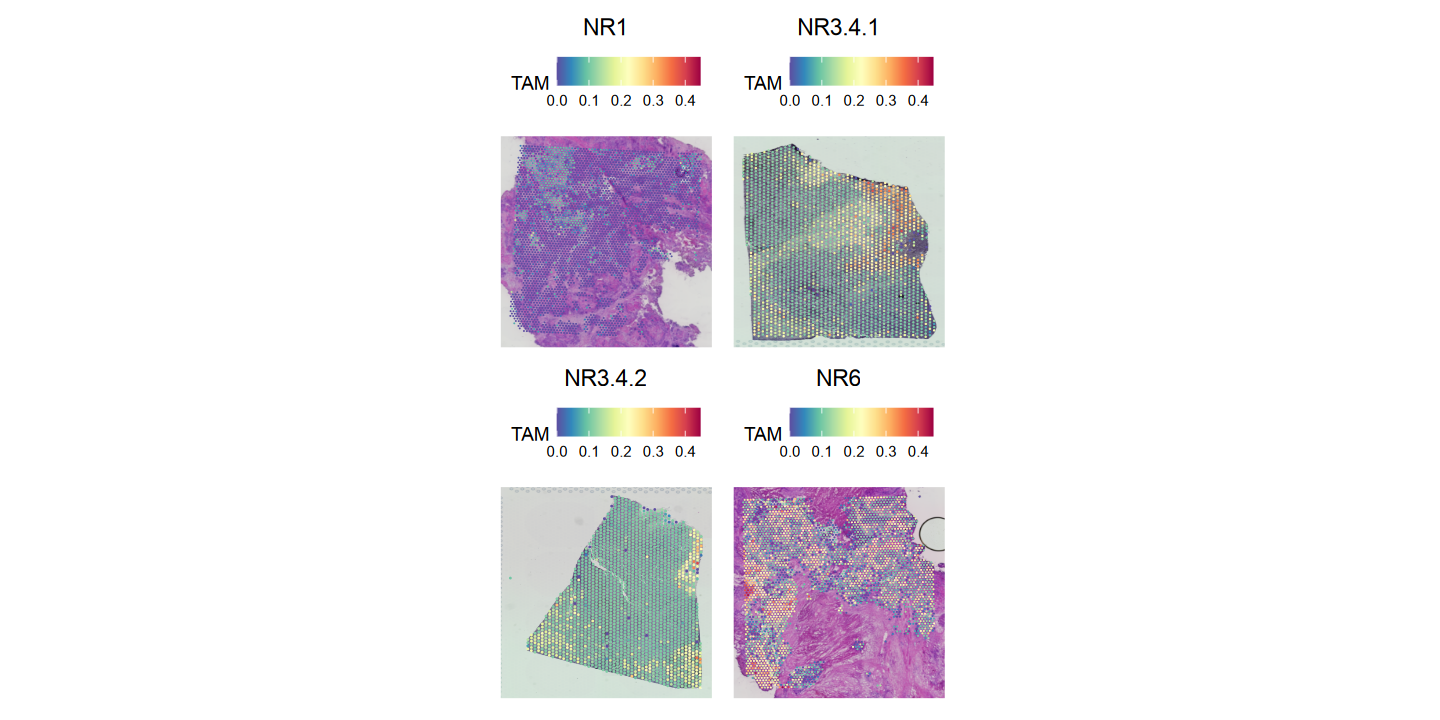

In [31]:
SpatialFeaturePlot(seur_obj, features ="TAM",ncol=2)

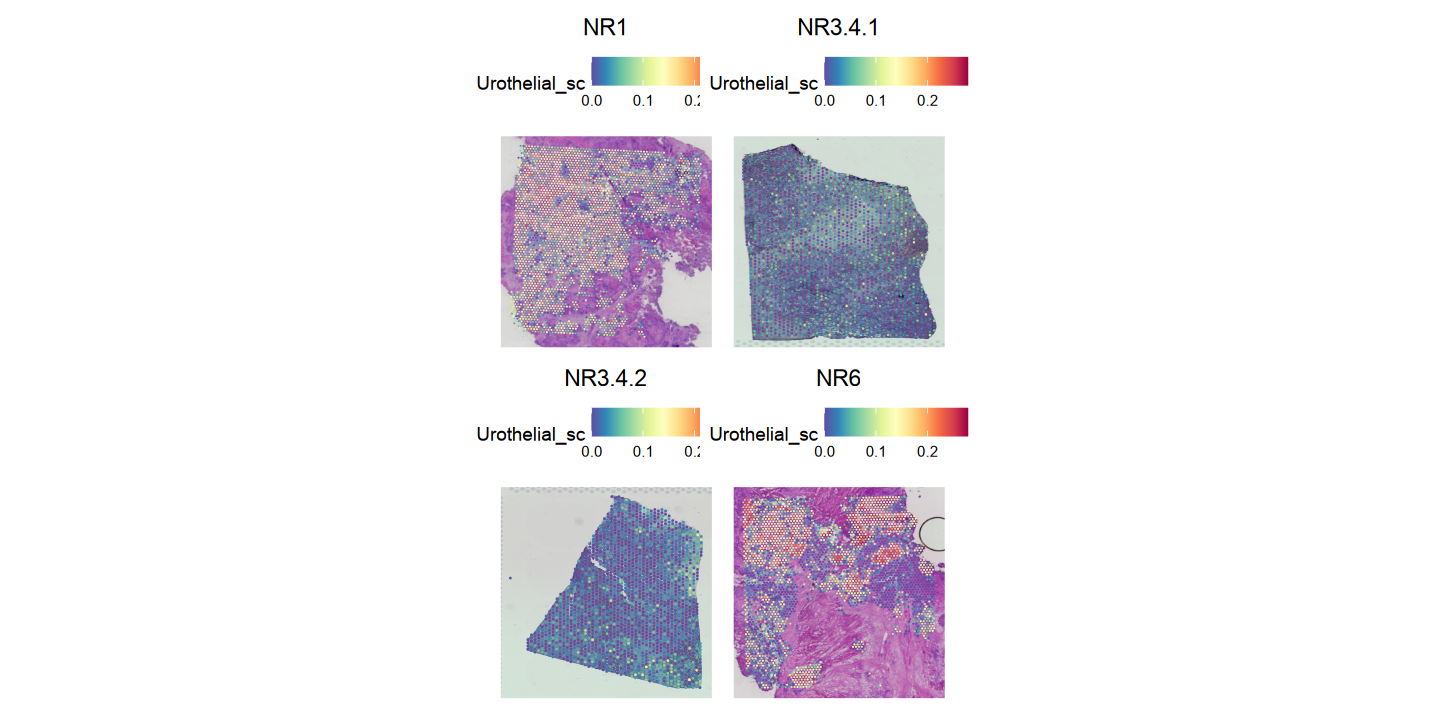

In [32]:
SpatialFeaturePlot(seur_obj, features ="Urothelial_sc",ncol=2)

In [33]:
seur_obj$TamUroSigScale = scale(seur_obj$TamUroSig)

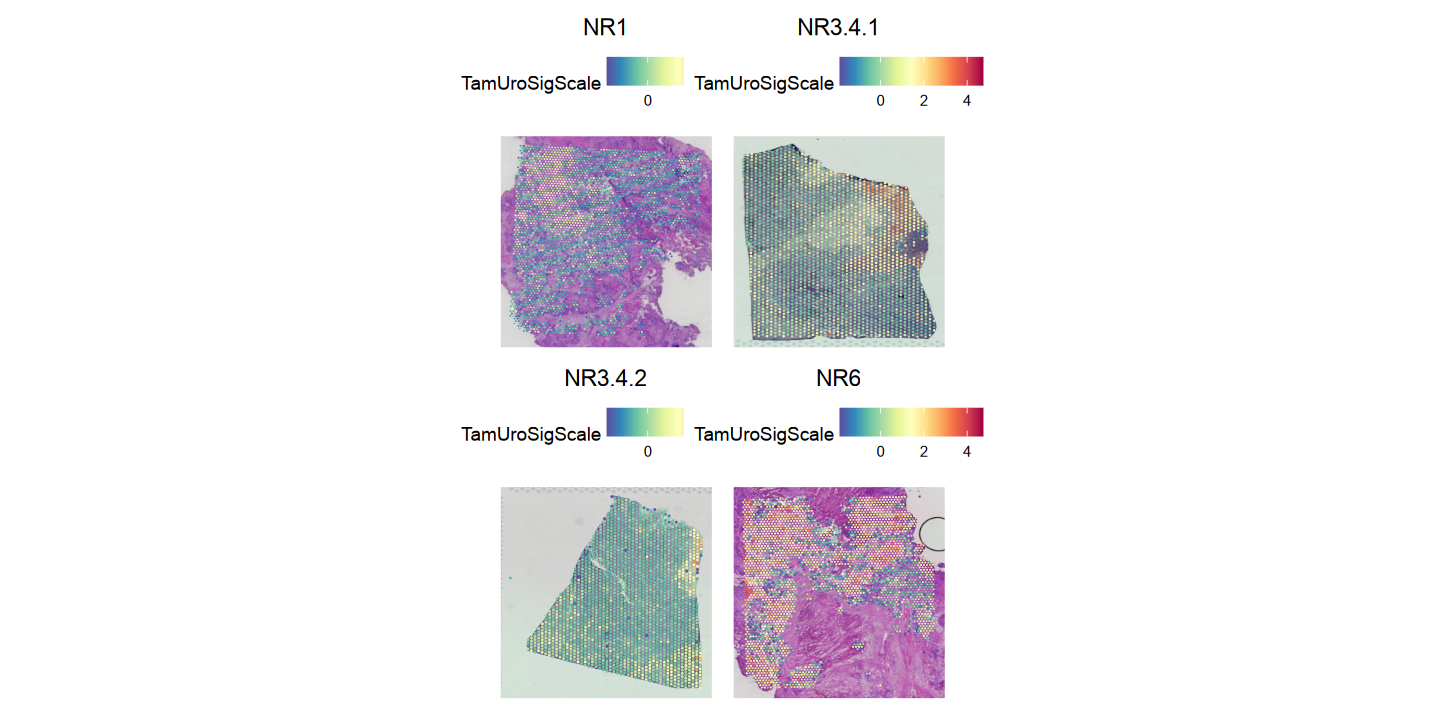

In [34]:
SpatialFeaturePlot(seur_obj, features ="TamUroSigScale",ncol=2)

In [35]:
seur_obj$TamUroSigScalePerSample = unlist(lapply(split(seur_obj$TamUroSig , as.factor(seur_obj$Sample)),scale),use.names=F)

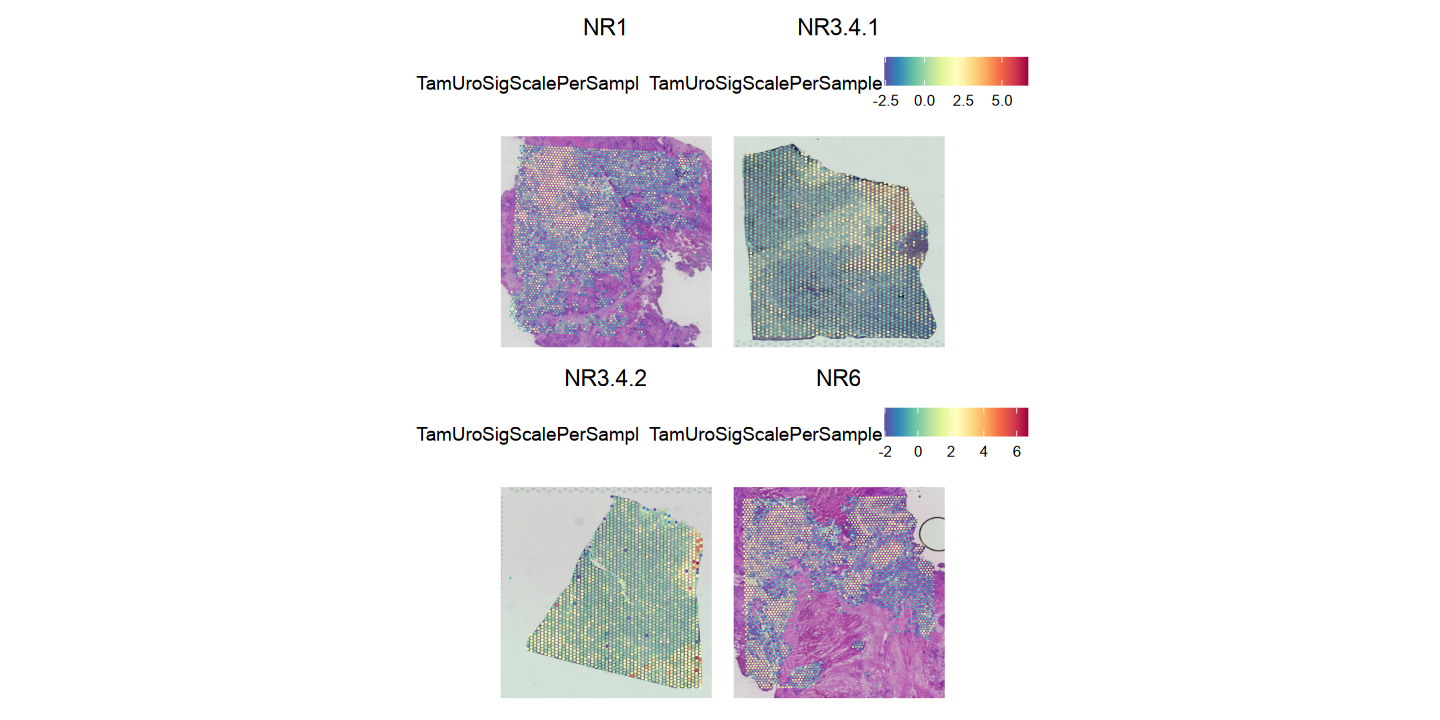

In [36]:
SpatialFeaturePlot(seur_obj, features ="TamUroSigScalePerSample",ncol=2)

In [37]:
geneSets <- GeneSet(uro.genes, setName="TAM")
cells_AUC <- AUCell_run(LayerData(seur_obj, assay="RNA",layer="counts")[,seur_obj$Sample == "NR3-4.1"], geneSets)
seur_obj$Urothelial_sc = unlist(assays(cells_AUC)[[1]])
geneSets <- GeneSet(uro.genes, setName="Urothelial_sc")
cells_AUC <- AUCell_run(LayerData(seur_obj, assay="RNA",layer="counts")[,seur_obj$Sample == "NR3-4.1"], geneSets)


In [38]:
table(seur_obj$Sample, seur_obj$harmonysct_clusters)

         
             0    1    2    3    4    5    6
  NR1     2046  108   34  818  413   26    0
  NR3-4.1  182  831  779   44   60  258   60
  NR3-4.2  146  540  955   32   32   33  235
  NR6     1199  425   29  855  463   61    1

In [39]:
rownames(seur_obj)[grepl("KRT",rownames(seur_obj))]

[1] "KRTCAP2" "KRT8"    "KRT18"   "KRT10"

In [53]:
lapply(Misc(seur_obj,"CompartmentGeneMarkers"),head,10)

$`0`
     feature group  avgExpr     logFC statistic       auc pval padj   pct_in
3936   GATA3     0 1.708356 1.2236711  21265671 0.8392229    0    0 88.21718
5249    KLF5     0 1.625704 1.1321196  19621526 0.7743388    0    0 77.07809
5281  ARGLU1     0 1.920026 1.1147909  20844336 0.8225955    0    0 94.03862
6466   MLLT6     0 1.794950 1.1130632  20661344 0.8153739    0    0 90.73608
7747   LAMA5     0 1.649932 1.0881617  21472582 0.8473884    0    0 91.77162
7404   CYTH2     0 1.600131 0.9729049  20993406 0.8284783    0    0 91.46376
3553   MROH1     0 1.452463 0.9484890  20451060 0.8070753    0    0 86.50994
3565   KIFC2     0 1.208604 0.9297794  20223376 0.7980901    0    0 75.93059
5       AGRN     0 1.536324 0.8705501  20294304 0.8008892    0    0 90.90400
980    FOSL2     0 1.542213 0.8464535  19368446 0.7643513    0    0 90.12035
      pct_out
3936 33.38973
5249 30.64016
5281 67.92160
6466 57.78342
7747 45.50197
7404 60.84320
3553 46.55950
3565 28.22899
5    59.54597
980  50.90243

$`1`
      feature group  avgExpr    logFC statistic       auc          pval
13990     B2M     1 2.661285 1.626609  14252819 0.8544372  0.000000e+00
10736    CD74     1 2.737970 1.525769  14963194 0.8970232  0.000000e+00
8467     C1QB     1 1.888147 1.370285  14134605 0.8473504  0.000000e+00
13468     UBC     1 2.507707 1.310350  11713654 0.7022177 2.234702e-194
13324     LUM     1 1.425356 1.179015  14126228 0.8468482  0.000000e+00
8466     C1QC     1 1.621157 1.176805  14149576 0.8482479  0.000000e+00
12581    CTSD     1 1.803243 1.145385  13289594 0.7966931  0.000000e+00
13304     LYZ     1 1.503611 1.142555  13459168 0.8068589  0.000000e+00
11644    CTSB     1 2.456387 1.136261  13567952 0.8133803  0.000000e+00
8536   LAPTM5     1 1.514546 1.084244  14249120 0.8542154  0.000000e+00
               padj   pct_in  pct_out
13990  0.000000e+00 96.21849 63.01792
10736  0.000000e+00 98.47689 76.55519
8467   0.000000e+00 87.23739 36.01187
13468 1.127915e-192 77.46849 42.94030
13324  0.000000e+00 81.77521 24.48351
8466   0.000000e+00 88.23529 36.09177
12581  0.000000e+00 85.60924 43.87627
13304  0.000000e+00 79.93697 26.70928
11644  0.000000e+00 97.89916 76.38397
8536   0.000000e+00 90.91387 36.29723

$`2`
      feature group  avgExpr    logFC statistic       auc pval padj   pct_in
21796     UBC     2 3.378658 2.341979  13656981 0.8570002    0    0 97.27323
24741 SLC25A6     2 2.439958 1.891739  15125240 0.9491362    0    0 97.21758
23845   UBA52     2 3.119286 1.843477  14954467 0.9384198    0    0 99.27657
21457    LDHB     2 2.431091 1.811955  14609826 0.9167930    0    0 96.77240
21535   EIF4B     2 2.441096 1.801664  15151125 0.9507605    0    0 98.16361
17147  ATP1A1     2 2.237455 1.773877  15267182 0.9580433    0    0 97.66277
20070   SDCBP     2 2.139745 1.633370  14762090 0.9263478    0    0 97.27323
24554     MIF     2 2.358427 1.558561  14996200 0.9410387    0    0 98.44185
18192  CTNNB1     2 2.025816 1.553420  14002652 0.8786917    0    0 94.04563
16865    SDC3     2 2.196993 1.510740  14669318 0.9205262    0    0 97.99666
       pct_out
21796 39.34371
24741 34.74290
23845 77.55977
21457 36.59224
21535 47.40641
17147 36.70501
20070 34.83311
24554 58.55886
18192 39.18584
16865 52.14253

$`3`
      feature group  avgExpr    logFC statistic       auc pval padj   pct_in
26082   ACTG2     3 2.480398 2.057499  14125572 0.9058289    0    0 92.28130
32627    MYL9     3 2.854987 1.939358  14546414 0.9328162    0    0 99.48542
29641   TAGLN     3 2.852797 1.925580  14464675 0.9275745    0    0 99.14237
30948   MYH11     3 2.200181 1.899208  14081764 0.9030196    0    0 88.33619
25735   CSRP1     3 2.620451 1.733693  14302272 0.9171602    0    0 98.17038
32830  COL6A2     3 3.082145 1.712609  14294013 0.9166305    0    0 99.59977
32077    CNN1     3 1.756792 1.517264  13855480 0.8885087    0    0 86.27787
29069   ACTA2     3 2.211768 1.464870  13465418 0.8634953    0    0 95.59748
28620    TPM2     3 2.567190 1.451328  13801802 0.8850665    

In [42]:
my.matches = c("EPI","MYEL","EPI","STR","EPI","MYEL","MYEL")

In [43]:
names(my.matches) = seq(0, (length(my.matches) - 1))

In [44]:
my.matches2 = my.matches[match(seur_obj$harmonysct_clusters, names(my.matches))]

In [45]:
names(my.matches2) = NULL

In [46]:
my.matches2[grepl("6_0|6_1", seur_obj$SubCluster)] = "TAM"

In [47]:
seur_obj$Designation = my.matches2

In [48]:
table(seur_obj$Sample,seur_obj$Designation)

         
           EPI MYEL  STR  TAM
  NR1     2493  134  818    0
  NR3-4.1 1020  908   39  247
  NR3-4.2 1133  803   32    5
  NR6     1691  483  855    4

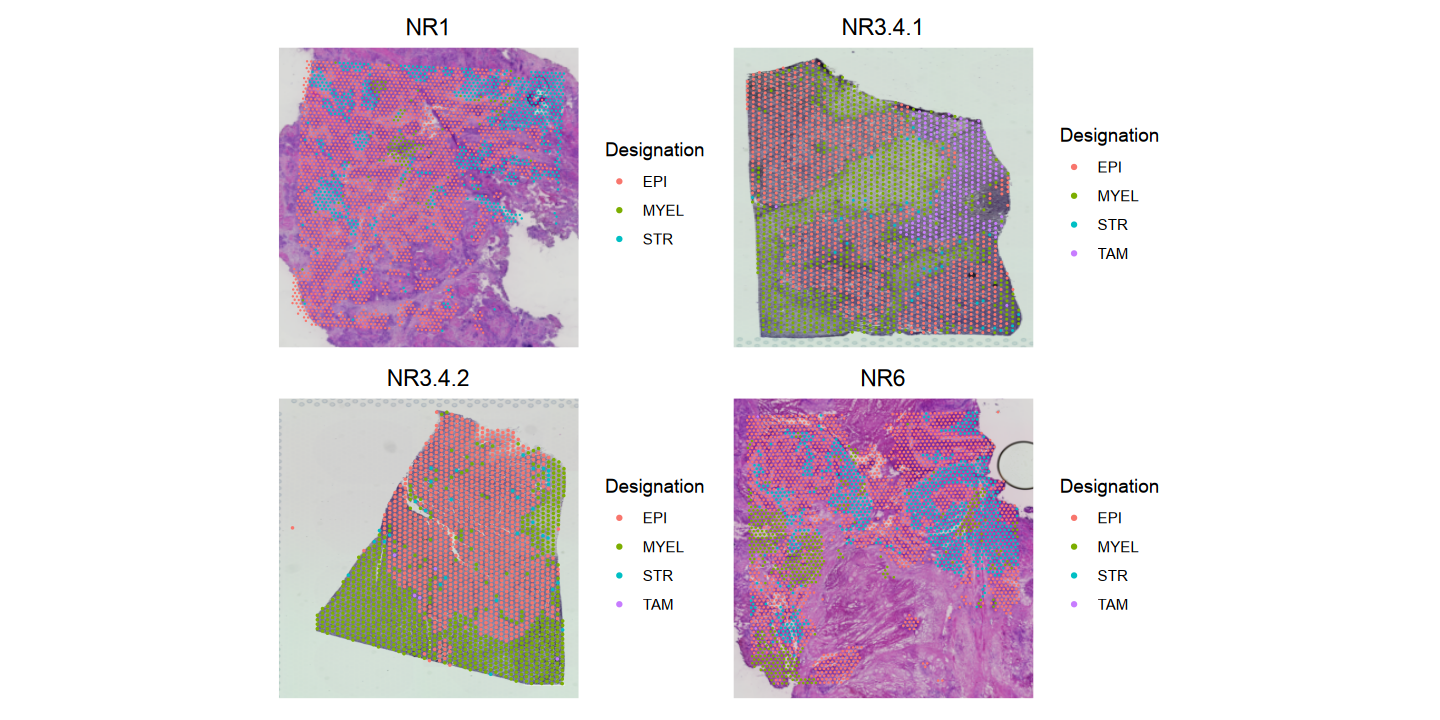

In [49]:
SpatialDimPlot(seur_obj, group.by="Designation",ncol=2)

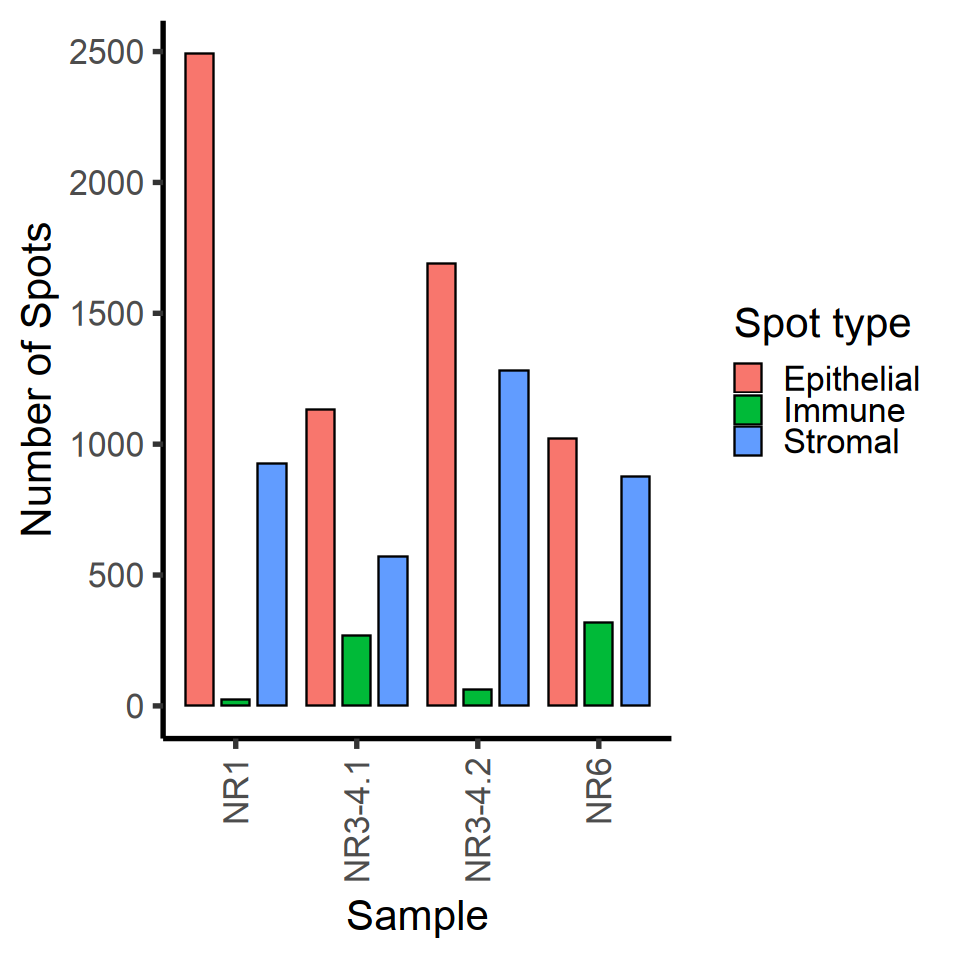

    NR1 NR3-4.1 NR3-4.2     NR6 
   3445    1973    3033    2214 


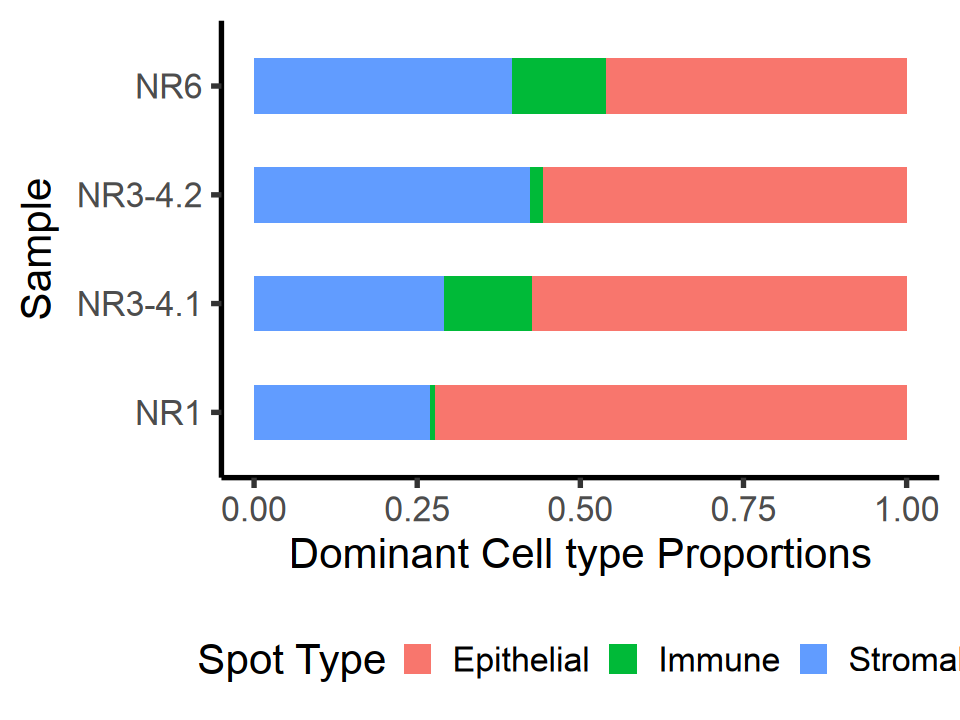

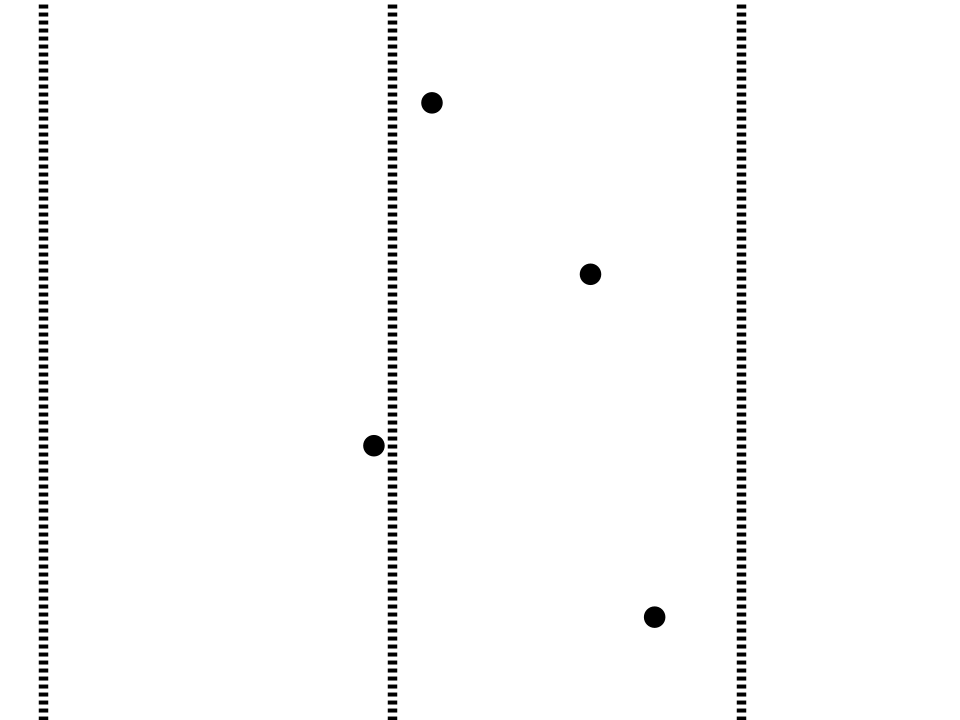

In [60]:
#Load object
seur_obj = readRDS("20240621_object.RDS")
#Cluster matching
my.matches = c("EPI","STR","EPI","STR","EPI","IMM","IMM")
names(my.matches) = seq(1,length(my.matches)) - 1
my.matches = my.matches[match(unlist(seur_obj[[Misc(seur_obj,"cluster.choose")]]),names(my.matches))]
names(my.matches) = NULL
seur_obj$TempDes = my.matches
#seur_obj$TempDes[seur_obj$TAM > quantile(seur_obj$TAM,0.97)] = "TAM"
names(seur_obj@images) = c("NR1","NR3.1","NR3.2","NR6")
ggplot.df = reshape2::melt(table(seur_obj$TempDes,seur_obj$Sample))
ggplot.df$Var1  = gsub("EPI","Epithelial",ggplot.df$Var1)
ggplot.df$Var1  = gsub("IMM","Immune",ggplot.df$Var1)
ggplot.df$Var1  = gsub("STR","Stromal",ggplot.df$Var1)
ggplot.df$Var1 = gsub("TAM","Immune",ggplot.df$Var1)
#Vertical bars (original)
options(repr.plot.height=8,repr.plot.width=8)
p = ggbarplot(ggplot.df, x = "Var2",y="value",fill="Var1",position = position_dodge(0.9)) + xlab("Sample") + ylab("Number of Spots") +
theme_classic(base_size=25) + guides(fill=guide_legend(title="Spot type")) + scale_x_discrete(guide = guide_axis(angle = 90))
plot(p)
ggsave("Carvalho_barplot.svg",p,units="in",dpi=300,width=8,height=8)
system("rclone copy --progress Carvalho_barplot.svg Drive:Carvalho_SVGs")
#HOrizontal (New)
options(repr.plot.width=8,repr.plot.height=6)
p = ggplot(ggplot.df, aes(fill=Var1, y=Var2, x=value,width=0.5)) + 
    geom_bar(position="fill", stat="identity",width=0.5) + xlab("Dominant Cell type Proportions") + ylab("Sample") +
theme_classic(base_size=25) + guides(fill=guide_legend(title="Spot Type"))  + theme(legend.position="bottom")
p
ggsave("Barplot_horizontal.svg", p, units="in",height=6,width=8, dpi=300)
system("rclone copy --progress Barplot_horizontal.svg Drive:Carvalho_SVGs")
#Make the total cells DF
total.cells =  unlist(lapply(split(ggplot.df, ggplot.df$Var2), function(x) sum(x$value)))
print(total.cells)
#Log2, fix names, make into DF
total.cellslog2 = log2(total.cells)
total.cellslog2 = reshape2::melt(total.cellslog2)
total.cellslog2$Sample = rownames(total.cellslog2)
colnames(total.cellslog2)[1] = "Log2Spots"
#Generate plot with points, empty x and y axes, add horizontal lines
p = ggplot(total.cellslog2, aes(x=Log2Spots,y=Sample)) + geom_point(size=5) +
theme_void(base_size=25) + xlim(c(10,12.5)) + 
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
geom_vline(xintercept = 10,linetype="dashed",linewidth=2) +
geom_vline(xintercept = 11,linetype="dashed",linewidth=2) + 
geom_vline(xintercept = 12,linetype="dashed",linewidth=2)

plot(p)

ggsave("Spotnumber_plot.svg", p, units="in",height=6,width=8, dpi=300)
system("rclone copy --progress Spotnumber_plot.svg Drive:Carvalho_SVGs")

In [61]:
ggsave("Spotnumber_plot.svg", p, units="in",height=6,width=8, dpi=300)
system("rclone copy --progress Spotnumber_plot.svg Drive:Carvalho_SVGs")

In [62]:
seur_obj$TempDes[seur_obj$TempDes == "TAM"] = "IMM"

In [63]:
table(seur_obj$TempDes)


 EPI  IMM  STR 
6338  674 3653 

In [64]:
Idents(seur_obj) = make.names(seur_obj$TempDes)

In [65]:
table(Idents(seur_obj))


 EPI  STR  IMM 
6338 3653  674 

In [66]:
seur_obj = run_presto_compartment_markers(seur_obj)
seur_obj = run_subclustering_presto(seur_obj,dims.choose = 1:10)

[1] "EPI"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6338
Number of edges: 209408

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8966
Number of communities: 4
Elapsed time: 0 seconds
[1] "STR"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3653
Number of edges: 120741

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9060
Number of communities: 5
Elapsed time: 0 seconds
[1] "IMM"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 674
Number of edges: 23006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8930
Number of communities: 3
Elapsed time: 0 seconds


In [78]:
ggplot.df = as.data.frame.matrix(seur_obj@meta.data[,c("SubCluster","TAM")])

In [89]:
comparison.list = paste("IMM_2", setdiff(unique(seur_obj$SubCluster), "IMM_2"))

In [92]:
comparison.list = strsplit(comparison.list, " ")

In [123]:
sapply(seq(comparison.list), function(x) 0.5 + 0.03*x)

[1] 0.53 0.56 0.59 0.62 0.65 0.68 0.71 0.74 0.77 0.80 0.83

In [147]:
options(repr.plot.height=10, repr.plot.width=10)

p = VlnPlot(seur_obj,"TAM",group.by="SubCluster")  + ggtitle("") +
 scale_x_discrete(guide = guide_axis(angle = 90))


p = p + ylab("TAM Module Score") + theme_classic(base_size=25) + NoLegend()
p = p + stat_compare_means(label = "p.signif",comparisons = comparison.list,aes(label=..p.adj..),
                           bracket.size=0.3,
                           tip.length=0.01,
                           vjust=1,
                          label.y=sapply(seq(comparison.list), function(x) 0.44 + 0.02*x)) + ylim(0,0.65)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


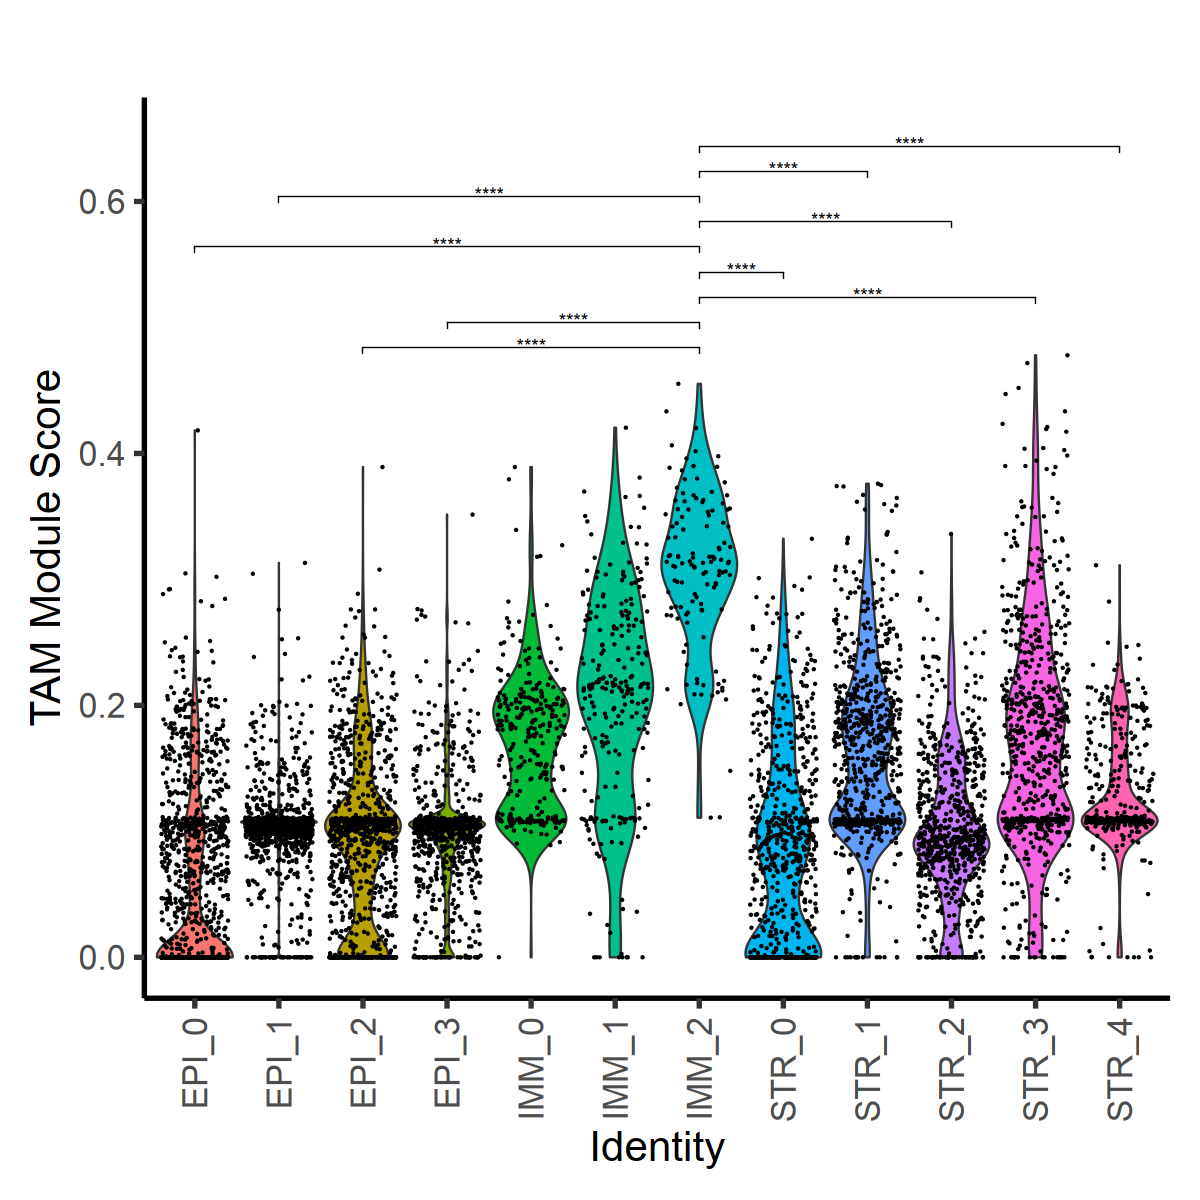

In [148]:
p

In [158]:
comparison.list = paste("IMM_2", setdiff(c("IMM_0","IMM_1","IMM_2"), "IMM_2"))
comparison.list = strsplit(comparison.list, " ")

In [169]:
options(repr.plot.height=10, repr.plot.width=10)

p = VlnPlot(seur_obj,"TAM",group.by="SubCluster")  + ggtitle("") +
 scale_x_discrete(guide = guide_axis(angle = 90))


p = p + ylab("TAM Module Score") + theme_classic(base_size=25) + NoLegend()
p = p + stat_compare_means(label = "p.signif",comparisons = comparison.list,aes(label=..p.adj..),
                           bracket.size=0.3,
                           tip.length=0.02,
                           vjust=1,
                          label.y=sapply(seq(comparison.list), function(x) 0.44 + 0.02*x)) + ylim(0,0.52)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


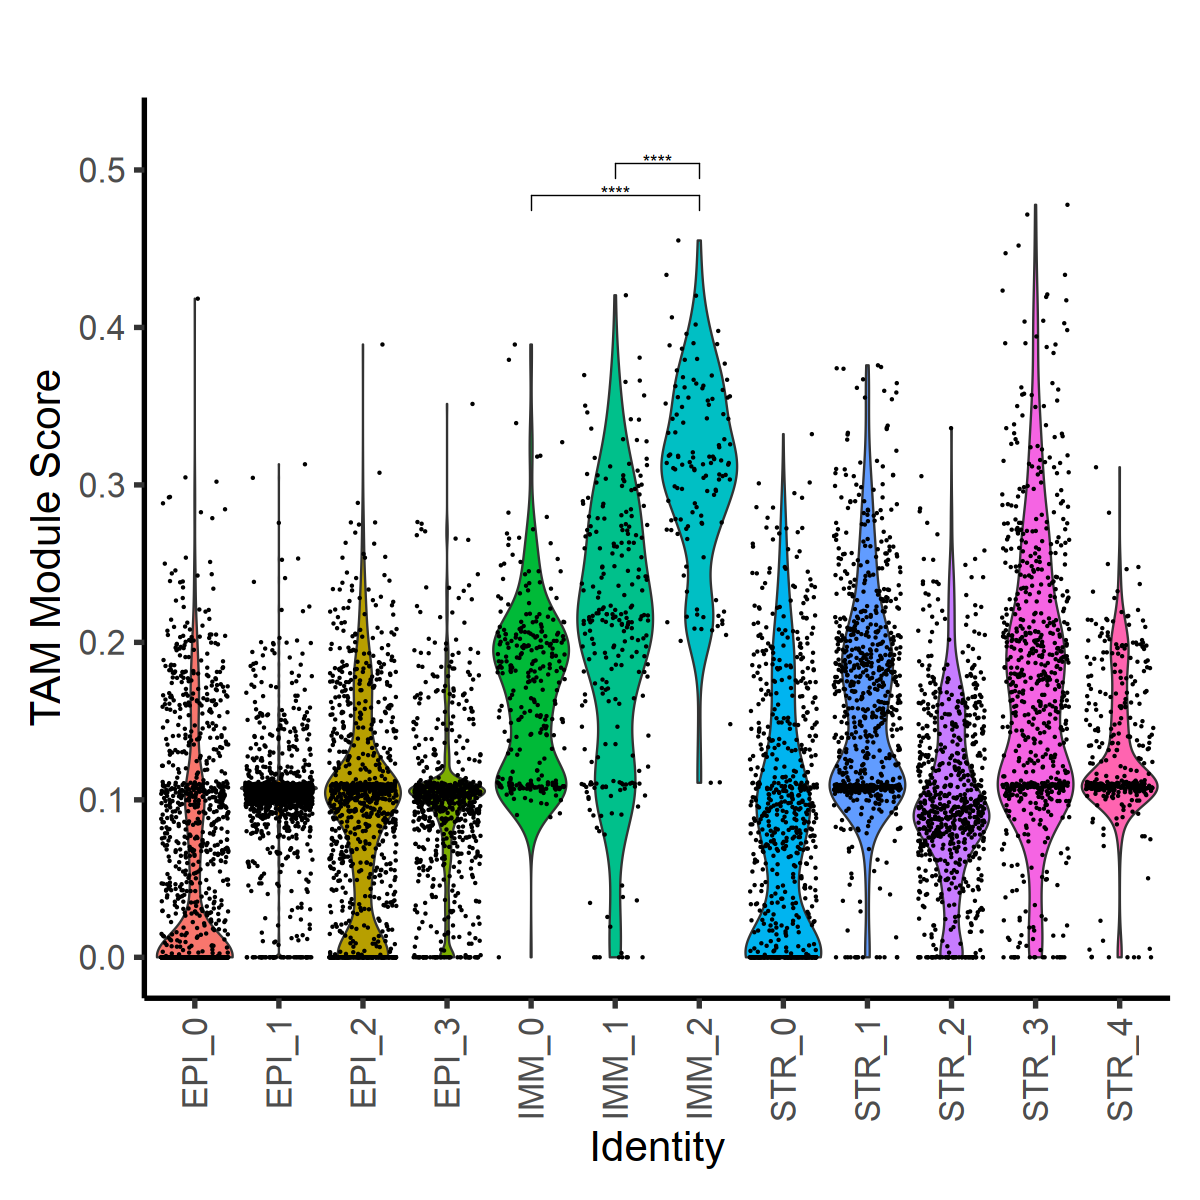

In [170]:
p

In [143]:
ggsave("250131_Carvalho_violin.svg",p,units="in",dpi=300,width=8,height=8)